In [1]:
import random
import time
import numpy as np
rng = np.random.default_rng()
import math
import sys
from numpy import linalg as LA
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/mhealth-img112-1500/chi-filter_mhealth.csv')

In [3]:
# Getting first 3 rows from df 
train_df = df.head(7453) 

# Printing df_first_3 
train_df 


,1,3,6,8,13,15,17,20,23,24,...,4448,4471,4564,4576,4599,4692,4700,4704,4727,class
0,591.38560,671.58936,803.10620,5712.6880,4286.9060,5023.6577,6725.6550,5066.3555,8718.198,2827.6548,...,531.726560,1676.107400,334.84494,448.94992,1065.90660,242.84879,246.74814,171.349150,1153.867700,1
1,1173.13570,509.83252,1103.15780,6456.5996,5280.1284,5237.9890,7109.0970,5752.1997,9729.044,3732.2275,...,2099.415000,1575.230800,1548.31460,3062.38450,2983.33740,239.90173,693.67450,1559.553100,1011.663600,1
2,700.56757,270.67456,666.17890,5629.0923,4182.9653,4710.7627,6470.0260,4955.4760,8370.811,2806.4004,...,2368.643300,0.000000,0.00000,3075.26250,1584.82530,0.00000,2049.24780,1540.262300,0.000000,1
3,725.74567,541.95900,830.46643,5689.9020,4490.4185,5022.4470,6738.3096,5037.4250,8896.703,3076.5173,...,6301.679000,1530.354900,3458.57900,1432.87110,1805.33390,5781.91100,5068.53700,2038.551300,254.717830,1
4,1074.90890,351.95690,960.53690,6055.0947,4904.6020,4910.7324,6759.9090,5373.9660,9229.115,3582.9604,...,200.318980,1047.592200,964.00300,291.60474,893.60370,671.04980,152.85808,329.899230,564.230900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7448,3272.08130,0.00000,2599.17160,13474.7420,9251.6370,8652.5840,13329.1560,10734.5910,17311.324,7711.3140,...,756.292200,1078.494800,1176.60790,848.89770,816.70984,811.42285,411.68604,592.891100,545.328400,13
7449,3046.90650,0.00000,2474.61130,13029.8860,8777.8720,8443.6130,12803.8720,10321.2730,16681.184,7080.5103,...,1.394551,0.000000,138.32834,0.00000,0.00000,0.00000,450.58932,39.472523,0.000000,13
7450,3522.50270,0.00000,3533.47900,15553.5205,11047.0720,10227.2340,15730.8660,12610.0710,20796.758,8408.5360,...,1044.927000,62.558613,439.49686,731.48627,0.00000,380.01900,503.30704,658.255070,48.879673,13
7451,2985.84100,0.00000,2985.18140,13976.9080,9815.4080,9442.0080,14214.2410,11404.3230,18621.445,7160.7163,...,1701.311900,644.716400,0.00000,1766.07980,621.40890,42.70770,1083.81630,1741.104700,531.524700,13


In [4]:
Y_train=train_df["class"]
# converting column without decimal to integer
for col in train_df.columns:
    if np.sum((train_df[col] - train_df[col].astype('int'))) == 0:
        train_df[col] = train_df[col].astype('int')
        

In [5]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [6]:
train_df.head()

,1,3,6,8,13,15,17,20,23,24,...,4448,4471,4564,4576,4599,4692,4700,4704,4727,class
0,591.38560,671.58936,803.10620,5712.6880,4286.9060,5023.6577,6725.6550,5066.3555,8718.198,2827.6548,...,531.72656,1676.1074,334.84494,448.94992,1065.9066,242.84879,246.74814,171.34915,1153.86770,1
1,1173.13570,509.83252,1103.15780,6456.5996,5280.1284,5237.9890,7109.0970,5752.1997,9729.044,3732.2275,...,2099.41500,1575.2308,1548.31460,3062.38450,2983.3374,239.90173,693.67450,1559.55310,1011.66360,1
2,700.56757,270.67456,666.17890,5629.0923,4182.9653,4710.7627,6470.0260,4955.4760,8370.811,2806.4004,...,2368.64330,0.0000,0.00000,3075.26250,1584.8253,0.00000,2049.24780,1540.26230,0.00000,1
3,725.74567,541.95900,830.46643,5689.9020,4490.4185,5022.4470,6738.3096,5037.4250,8896.703,3076.5173,...,6301.67900,1530.3549,3458.57900,1432.87110,1805.3339,5781.91100,5068.53700,2038.55130,254.71783,1
4,1074.90890,351.95690,960.53690,6055.0947,4904.6020,4910.7324,6759.9090,5373.9660,9229.115,3582.9604,...,200.31898,1047.5922,964.00300,291.60474,893.6037,671.04980,152.85808,329.89923,564.23090,1


In [7]:
Y_train.shape

(7453,)

In [8]:
print(f'Number of rows: {train_df.shape[0]};  Number of columns: {train_df.shape[1]}; No of missing values: {sum(train_df.isna().sum())}')

Number of rows: 7453;  Number of columns: 1501; No of missing values: 0


In [9]:
train_df=train_df.drop(['class' ], axis=1)

In [10]:
train_df.head()

,1,3,6,8,13,15,17,20,23,24,...,4436,4448,4471,4564,4576,4599,4692,4700,4704,4727
0,591.38560,671.58936,803.10620,5712.6880,4286.9060,5023.6577,6725.6550,5066.3555,8718.198,2827.6548,...,936.16766,531.72656,1676.1074,334.84494,448.94992,1065.9066,242.84879,246.74814,171.34915,1153.86770
1,1173.13570,509.83252,1103.15780,6456.5996,5280.1284,5237.9890,7109.0970,5752.1997,9729.044,3732.2275,...,222.37271,2099.41500,1575.2308,1548.31460,3062.38450,2983.3374,239.90173,693.67450,1559.55310,1011.66360
2,700.56757,270.67456,666.17890,5629.0923,4182.9653,4710.7627,6470.0260,4955.4760,8370.811,2806.4004,...,0.00000,2368.64330,0.0000,0.00000,3075.26250,1584.8253,0.00000,2049.24780,1540.26230,0.00000
3,725.74567,541.95900,830.46643,5689.9020,4490.4185,5022.4470,6738.3096,5037.4250,8896.703,3076.5173,...,9956.28300,6301.67900,1530.3549,3458.57900,1432.87110,1805.3339,5781.91100,5068.53700,2038.55130,254.71783
4,1074.90890,351.95690,960.53690,6055.0947,4904.6020,4910.7324,6759.9090,5373.9660,9229.115,3582.9604,...,787.92300,200.31898,1047.5922,964.00300,291.60474,893.6037,671.04980,152.85808,329.89923,564.23090


In [11]:
best_col1500 = list(train_df.columns)

In [12]:

res = [eval(i) for i in best_col1500]
print("Modified list is: ", len(res))

Modified list is:  1500


In [13]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [14]:
X_train = train_df.to_numpy()
y_train = Y_train.to_numpy()

In [15]:
feat_list=list(train_df.keys())
len(feat_list)

1500

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [17]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from numpy.random import rand
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import xgboost as xg


# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [18]:
from sklearn.svm import SVC

In [19]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d]  = 1
            else:
                Xbin[i,d]  = 0
    
    return Xbin

In [20]:
# error rate
def error_rate(xtrain, ytrain, x):
    # parameters
    xt, xv, yt, yv = train_test_split(xtrain, ytrain, test_size=0.25, shuffle=True)
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    x_train = xt[:, x == 1]
    y_train = yt.reshape(num_train)
    x_valid = xv[:, x == 1]
    y_valid = yv.reshape(num_valid)
    # Training
    #mdl     = LinearRegression()
    #mdl.fit(xtrain, ytrain)
    #X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size = 0.25)
    clf = LinearRegression() 
    clf.fit(x_train, y_train)
    #accuracy = clf.score(xv,yv)

    #print('Accuracy: ',accuracy)
    # Prediction
    ypred   = clf.predict(x_valid)
    error   = mean_squared_error(y_valid, ypred, squared=False)
    print(error)
    return error

In [21]:
def fun(x, xtrain, ytrain):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    thres = 0.5
    # original feature size
    max_feat = np.size(xtrain, 1)
    print(max_feat)
    
    # Number of selected features
    num_feat = np.sum(x == 1)
    print(num_feat)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x)
        # Objective function
        cost = alpha * (1-error) + beta * (num_feat / max_feat)
        print(cost)
    return cost

# This function is to initialize the Honey Badger population.
def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random()*(ub[j] - lb[j]) + lb[j]
    return X

# Calculate fitness values for each Honey Badger.
def CaculateFitness1(X,fun, X_train, y_train):
    fitness = fun(X, X_train, y_train)
    print(fitness)
    return fitness

# Sort fitness.
def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness,index


# Sort the position of the Honey Badger according to fitness.
def SortPosition(X,index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i,:] = X[index[i],:]
    return Xnew


# Boundary detection function.
def BorderCheck1(X,lb,ub,dim):
        for j in range(dim):
            if X[j]<lb[j]:
                X[j] = ub[j]
            elif X[j]>ub[j]:
                X[j] = lb[j]
        return X
def Intensity(pop,GbestPositon,X):
  epsilon = 0.00000000000000022204
  di = np.zeros(pop)
  S = np.zeros(pop)
  I = np.zeros(pop)
  for j in range(pop):
    if (j <= pop):
      di[j]=LA.norm([[X[j,:]-GbestPositon+epsilon]])
      S[j]= LA.norm([X[j,:]-X[j+1,:]+epsilon])
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)
    else:
      di[j]=[ LA.norm[[X[pop,:]-GbestPositon+epsilon]]]
      S[j]=[LA.norm[[X[pop,:]-X[1,:]+epsilon]]]
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)    
  
    for i in range(pop):
      n = random.random()
      I[i] = n*S[i]/[4*math.pi*di[i]]
    return I

In [22]:
def hba(pop,dim,lb,ub,Max_iter,fun, X_train, y_train):
    X = initial(pop, dim, lb,ub)                    # Initialize the number of honey badgers
    fitness = np.zeros([pop, 1])
    for i in range(pop):
      print("Calculate fitness Iteration:", i + 1)
      # Binary conversion
      Xbin = binary_conversion(X, 0.5, pop, dim)
      fitness[i] = CaculateFitness1(Xbin[i, :], fun, X_train, y_train)
    fitness, sortIndex = SortFitness(fitness)       # Sort the fitness values of honey badger.
    X = SortPosition(X, sortIndex)                  # Sort the honey badger.
    GbestScore = fitness[0]                         # The optimal value for the current iteration.
    GbestPositon = np.zeros([1, dim])
    GbestPositon[0, :] = X[0, :]
    Curve = np.zeros([Max_iter, 1])
    C = 2                                          # constant in Eq. (3)
    beta = 6                                       # the ability of HB to get the food  Eq.(4)
    vec_flag=[1,-1]
    vec_flag=np.array(vec_flag)
    Xnew = np.zeros([pop, dim])
    for t in range(Max_iter):
        print("Digging and honey phase, iteration: ",t+1)
        alpha=C*math.exp(-t/Max_iter);             # density factor in Eq. (3)
        I=Intensity(pop,GbestPositon,X);           # intensity in Eq. (2)
        Vs=random.random()
        for i in range(pop):
          print("Population, iteration: ",i+1)
          Vs=random.random()
          F=vec_flag[math.floor((2*random.random()))]
          for j in range(dim):
            di=GbestPositon[0,j]-X[i,j]
            if (Vs <0.5):                           # Digging phase Eq. (4)
              r3=np.random.random()
              r4=np.random.randn()
              r5=np.random.randn()
              Xnew[i,j]=GbestPositon[0,j] +F*beta*I[i]* GbestPositon[0,j]+F*r3*alpha*(di)*np.abs(math.cos(2*math.pi*r4)*(1-math.cos(2*math.pi*r5)));
            else:
              r7=random.random()
              Xnew[i,j]=GbestPositon[0,j]+F*r7*alpha*di;    # Honey phase Eq. (6)
          #print(di)
          Xnew[i,:] = BorderCheck1(Xnew[i,:], lb, ub, dim)
          tempFitness = CaculateFitness1(Xnew[i,:], fun, X_train, y_train)
          if (tempFitness <= fitness[i]):
            fitness[i] = tempFitness               
            X[i,:] = Xnew[i,:] 
        for i in range(pop):                         
          X[i,:] = BorderCheck1(X[i,:], lb, ub ,dim)
        Ybest,index = SortFitness(fitness)               # Sort fitness values.
        if (Ybest[0] <= GbestScore):                          
          GbestScore = Ybest[0]     # Update the global optimal solution.
          GbestPositon[0, :] = X[index[0], :]           # Sort fitness values 
        Curve[t] = GbestScore
    return GbestScore,GbestPositon,Curve

In [23]:
rng = np.random.default_rng()
time_start = time.time()
pop = 20                   # Honey Badger population size.
MaxIter = 300               # Maximum number of iterations.
dim = np.size(xtrain, 1)                    # The dimension.
fl=-1                    # The lower bound of the search interval.
ul=1                      # The upper bound of the search interval.
lb = fl*np.ones([dim, 1])
ub = ul*np.ones([dim, 1])
GbestScore, GbestPositon, Curve = hba(pop, dim, lb, ub, MaxIter, fun,X_train, y_train )
time_end = time.time()
print(f"The running time is: {time_end  - time_start } s")
print('The optimal value：',GbestScore)
print('The optimal solution：',GbestPositon)


Calculate fitness Iteration: 1
1500
376
0.72449611258358
0.2752555152089224
0.2752555152089224
Calculate fitness Iteration: 2
1500
354
0.7645824387231472
0.23542338566408424
0.23542338566408424
Calculate fitness Iteration: 3
1500
374
0.6391096771118746
0.3597747529925775
0.3597747529925775
Calculate fitness Iteration: 4
1500
379
0.693144319837628
0.30631379002741493
0.30631379002741493
Calculate fitness Iteration: 5
1500
365
0.6710569533190321
0.3280869495474915
0.3280869495474915
Calculate fitness Iteration: 6
1500
391
0.744206404279952
0.25584232642951416
0.25584232642951416
Calculate fitness Iteration: 7
1500
331
0.7376546484601519
0.26192856469111625
0.26192856469111625
Calculate fitness Iteration: 8
1500
367
0.7305054151778055
0.26924630564063917
0.26924630564063917
Calculate fitness Iteration: 9
1500
367
0.7108308761896985
0.2887240992388651
0.2887240992388651
Calculate fitness Iteration: 10
1500
410
0.703443231988523
0.2963245336646955
0.2963245336646955
Calculate fitness Iterat

In [24]:
GbestPositon.shape

(1, 1500)

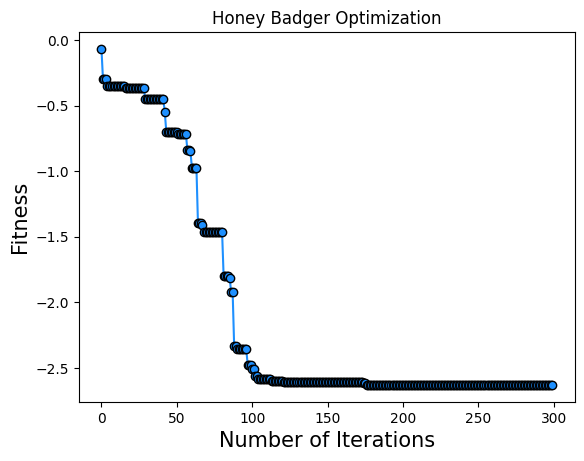

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot( Curve,color='dodgerblue', marker='o', markeredgecolor='k', markerfacecolor='dodgerblue')

ax.set_xlabel('Number of Iterations',fontsize=15)
ax.set_ylabel('Fitness',fontsize=15)
ax.set_title('Honey Badger Optimization')
plt.show()


In [26]:
Sel_feat = np.zeros([1, 1500], dtype='int')
for i in range(1):
        for d in range(1500):
            if GbestPositon[i,d] > 0:
                Sel_feat[i,d] = 1
            else:
                Sel_feat[i,d] = 0

In [27]:
si=Sel_feat.flatten()
si.shape

(1500,)

In [28]:
ind=np.argwhere(si)
selind=ind.flatten()
s_ind=list(selind)

In [29]:
X_train.shape

(7453, 1500)

In [30]:
Xtr= X_train[:, s_ind]

In [31]:
Xtr.shape

(7453, 736)

In [32]:
x_tr, x_te, y_tr, y_te = train_test_split(Xtr, y_train, test_size=0.20, shuffle=True)
mdl = SVC(kernel='linear') 
mdl.fit(x_tr, y_tr)
ac = mdl.score(x_te,y_te)
print(ac)

0.9812206572769953


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
target_names=['1','2','3','4','5','6','7','8','9','10','11','12','13']
y_pre = mdl.predict(x_te)
print(classification_report(y_te, y_pre, target_names=target_names))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       132
           2       1.00      0.99      1.00       117
           3       1.00      0.99      1.00       120
           4       1.00      0.99      1.00       131
           5       0.98      1.00      0.99       127
           6       0.98      0.96      0.97       111
           7       0.99      0.98      0.99       106
           8       0.98      0.98      0.98       119
           9       0.99      0.98      0.99       111
          10       0.96      1.00      0.98       129
          11       0.94      0.95      0.95       119
          12       0.95      0.95      0.95       128
          13       1.00      0.95      0.97        41

    accuracy                           0.98      1491
   macro avg       0.98      0.98      0.98      1491
weighted avg       0.98      0.98      0.98      1491



In [35]:
# convert array into dataframe 
best_feat_X_tr = pd.DataFrame(Xtr) 
best_feat_Y_tr = pd.DataFrame(y_train)

# save the dataframe as a csv file 
best_feat_X_tr.to_csv("mhealth_best_feat_X_train736.csv")
best_feat_Y_tr.to_csv("mhealth_best_feat_Y_train736.csv")

In [36]:
import seaborn as sns
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
y_pre

array([ 5,  9, 12, ...,  6, 12,  7])

In [38]:
y_p_l=[]
for i in y_pre:
    if i == 1:
        y_p_l.append('Nothing')
    if i == 2:
        y_p_l.append('Standing still')
    if i == 3:
        y_p_l.append('Sitting and relaxing')
    if i == 4:
        y_p_l.append('Lying down')
    if i == 5:
        y_p_l.append('Walking')
    if i == 6:
        y_p_l.append('Climbing stairs')
    if i == 7:
        y_p_l.append('Waist bends forward')
    if i == 8:
        y_p_l.append('Frontal elevation of arms')
    if i == 9:
        y_p_l.append('Knees bending')
    if i == 10:
        y_p_l.append('Cycling')
    if i == 11:
        y_p_l.append('Jogging')
    if i == 12:
        y_p_l.append('Running')
    if i == 13:
        y_p_l.append('Jump front & back')


y_t_l=[]
for i in y_te:
    if i == 1:
        y_t_l.append('Nothing')
    if i == 2:
        y_t_l.append('Standing still')
    if i == 3:
        y_t_l.append('Sitting and relaxing')
    if i == 4:
        y_t_l.append('Lying down')
    if i == 5:
        y_t_l.append('Walking')
    if i == 6:
        y_t_l.append('Climbing stairs')
    if i == 7:
        y_t_l.append('Waist bends forward')
    if i == 8:
        y_t_l.append('Frontal elevation of arms')
    if i == 9:
        y_t_l.append('Knees bending')
    if i == 10:
        y_t_l.append('Cycling')
    if i == 11:
        y_t_l.append('Jogging')
    if i == 12:
        y_t_l.append('Running')
    if i == 13:
        y_t_l.append('Jump front & back')
    

accuracy score: 0.9812206572769953
classification_report of model1:
                           precision    recall  f1-score   support

                  Nothing       0.99      1.00      1.00       132
           Standing still       1.00      0.99      1.00       117
     Sitting and relaxing       1.00      0.99      1.00       120
               Lying down       1.00      0.99      1.00       131
                  Walking       0.98      1.00      0.99       127
          Climbing stairs       0.98      0.96      0.97       111
      Waist bends forward       0.99      0.98      0.99       106
Frontal elevation of arms       0.98      0.98      0.98       119
            Knees bending       0.99      0.98      0.99       111
                  Cycling       0.96      1.00      0.98       129
                  Jogging       0.94      0.95      0.95       119
                  Running       0.95      0.95      0.95       128
        Jump front & back       1.00      0.95      0.97    

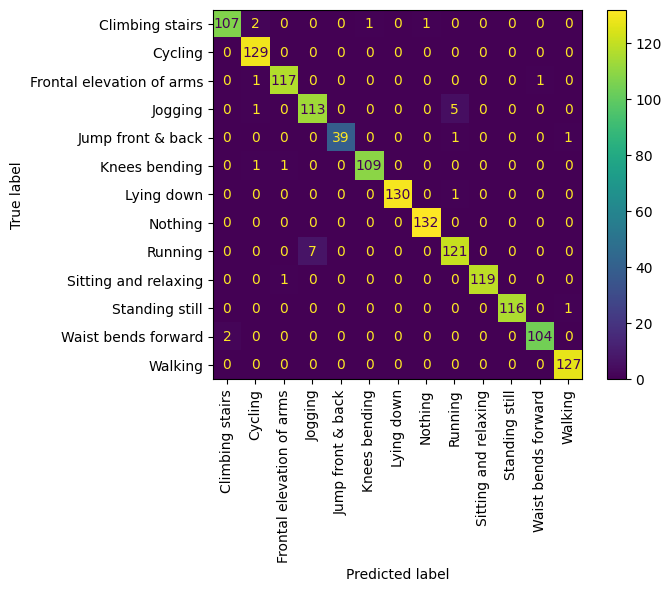

In [39]:
print('accuracy score:',acc(y_te,y_pre))
target_names=['Nothing','Standing still', 'Sitting and relaxing', 'Lying down', 'Walking', 'Climbing stairs', 'Waist bends forward','Frontal elevation of arms','Knees bending', 'Cycling', 'Jogging', 'Running', 'Jump front & back']
print("classification_report of model1:")
print(classification_report(y_te,y_pre, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
   y_t_l,y_p_l,xticks_rotation="vertical")
plt.show()